In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import cm
from matplotlib import colors as mcolors
%matplotlib inline
plt.style.use('ggplot')

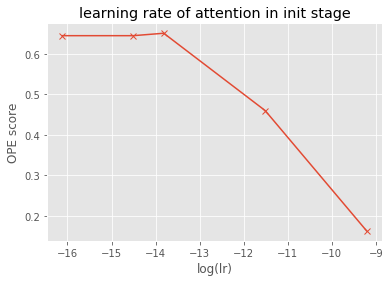

In [4]:
lr = np.array([1e-4, 1e-5, 1e-6, 5e-7, 1e-7])
lr = np.log(lr)
score = [0.163, 0.46, 0.651, 0.645, 0.645]
plt.title("learning rate of attention in init stage")
plt.xlabel("log(lr)")
plt.ylabel("OPE score")
plt.plot(lr, score, marker="x")
plt.savefig("lr_init.svg")
plt.show()

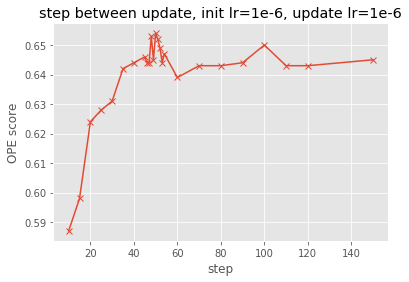

In [5]:
step = np.array([10, 15, 20, 25, 30, 35, 40, 
                 45, 46, 47, 48, 49, 50, 51,
                 52, 53, 54, 60, 70, 80, 90,
                 100, 110, 120, 150])
score_1 = np.array([0.587, 0.598, 0.624, 0.628, 0.631, 0.642, 0.644,
                  0.646, 0.644, 0.644, 0.653, 0.645, 0.654, 0.652,
                  0.649, 0.644, 0.647, 0.639, 0.643, 0.643, 0.644,
                  0.650, 0.643, 0.643, 0.645])
plt.title("step between update, init lr=1e-6, update lr=1e-6")
plt.xlabel("step")
plt.ylabel("OPE score")
plt.plot(step, score_1, marker="x")
plt.savefig("step.svg")
plt.show()

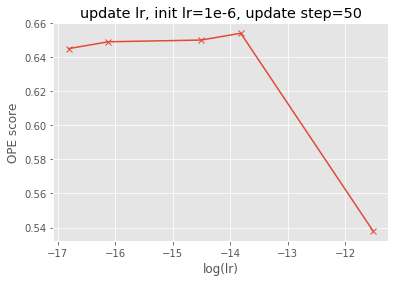

In [6]:
lr = np.array([1e-5, 1e-6, 5e-7, 1e-7, 5e-8])
lr = np.log(lr)
score_2 = np.array([0.538, 0.654, 0.65, 0.649, 0.645])
plt.title("update lr, init lr=1e-6, update step=50")
plt.xlabel("log(lr)")
plt.ylabel("OPE score")
plt.plot(lr, score_2, marker="x")
plt.savefig("update_lr.svg")
plt.show()

In [7]:
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)
def add_plot(ax, xs, ys, zs, color, zdir):
    verts = []
    for z in zs:
        verts.append(list(zip(xs, ys)))
    poly = PolyCollection(verts, facecolors=[cc(color)])
    poly.set_alpha(0.6)
    ax.add_collection3d(poly, zs=zs, zdir=zdir)

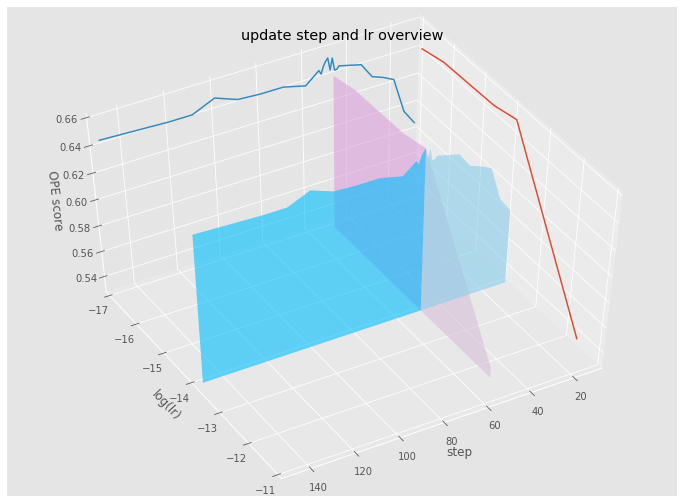

In [15]:
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection="3d")

min_score=0.53

split = 12
xs = list(step[:split+1])
ys = list(score_1[:split+1])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [math.log(1e-6)]
add_plot(ax, xs, ys, zs, "skyblue", zdir="y")

split = 12
xs = list(step[split:])
ys = list(score_1[split:])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [math.log(1e-6)]
add_plot(ax, xs, ys, zs, "deepskyblue", zdir="y")

split=1
xs = list(lr[:split+1])
ys = list(score_2[:split+1])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [50]
add_plot(ax, xs, ys, zs, "thistle", zdir="x")

split=1
xs = list(lr[split:])
ys = list(score_2[split:])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [50]
add_plot(ax, xs, ys, zs, "plum", zdir="x")

ax.set_title("update step and lr overview")
ax.set_xlabel('step')
ax.set_xlim3d(10, 150)
ax.set_ylabel('log(lr)')
ax.set_ylim3d(-17, -11)
ax.set_zlabel('OPE score')
ax.set_zlim3d(min_score, 0.66)

ax.view_init(elev=50., azim=60)

ax.plot([10]*lr.size, lr , score_2)
ax.plot(step, ([-17]*step.size), score_1)

fig.savefig("update_lr_overview.svg")
plt.show()

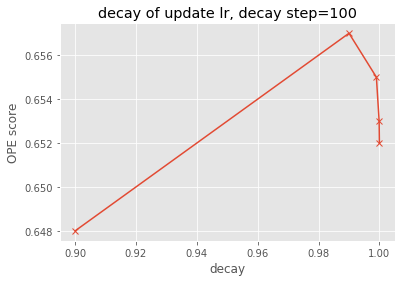

In [16]:
decay = np.array([0.9, 0.99, 0.999, 0.9999, 0.99999])
score_1 = np.array([0.648, 0.657, 0.655, 0.653, 0.652])
plt.title("decay of update lr, decay step=100")
plt.xlabel("decay")
plt.ylabel("OPE score")
plt.plot(decay, score_1, marker="x")
plt.savefig("decay.svg")
plt.show()

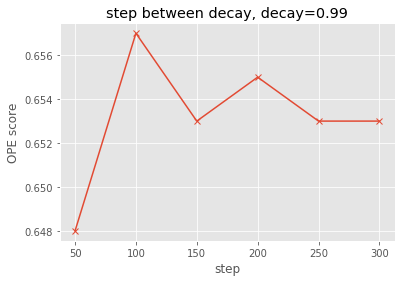

In [17]:
step = np.array([50, 100, 150, 200, 250, 300])
score_2 = np.array([0.648, 0.657, 0.653, 0.655, 0.653, 0.653])
plt.title("step between decay, decay=0.99")
plt.xlabel("step")
plt.ylabel("OPE score")
plt.plot(step, score_2, marker="x")
plt.savefig("step_decay.svg")
plt.show()

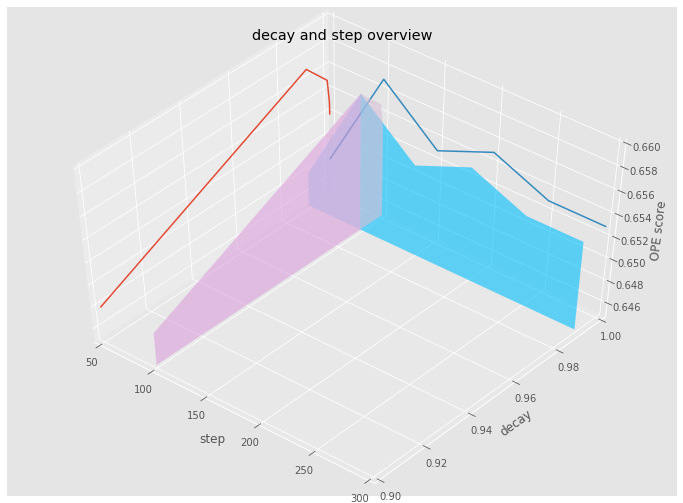

In [22]:
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection="3d")

min_score=0.645

split = 1
xs = list(step[:split+1])
ys = list(score_2[:split+1])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [0.99]
add_plot(ax, xs, ys, zs, "skyblue", zdir="y")

xs = list(step[split:])
ys = list(score_2[split:])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [0.99]
add_plot(ax, xs, ys, zs, "deepskyblue", zdir="y")

split=1
xs = list(decay[:split+1])
ys = list(score_1[:split+1])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [100]
add_plot(ax, xs, ys, zs, "plum", zdir="x")

xs = list(decay[split:])
ys = list(score_1[split:])
xs = xs[:1] + xs + xs[-1:]
ys = [min_score] + ys + [min_score]
zs = [100]
add_plot(ax, xs, ys, zs, "thistle", zdir="x")

ax.set_title("decay and step overview")
ax.set_xlabel('step')
ax.set_xlim3d(50, 300)
ax.set_ylabel('decay')
ax.set_ylim3d(0.9, 1)
ax.set_zlabel('OPE score')
ax.set_zlim3d(min_score, 0.66)

ax.view_init(elev=50., azim=-50)

ax.plot(([50]*decay.size), decay, score_1)
ax.plot(step, [1.0]*step.size, score_2)

fig.savefig("decay_step_overview.svg")
plt.show()

In [25]:
import json
import pickle

In [30]:
def get_fps(json_path):
    data = json.load(open(json_path, "r"))
    seq = pickle.load(open("../data/vot-otb.pkl", "rb"))
    fps = []
    for seqname, _ in seq.items():
        fps.append(data[seqname+"time"][-1])
    return fps

In [33]:
fps_DaSiamRPN = get_fps("../results/DaSiamRPN.json")
fps_DaSiamRPNAT = get_fps("../results/DaSiamRPNAT.json")
fps_DaSiamRPNAT2 = get_fps("../results/DaSiamRPNAT2.json")

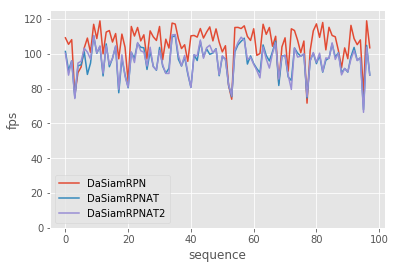

In [63]:
plt.plot(fps_DaSiamRPN, label="DaSiamRPN")
plt.plot(fps_DaSiamRPNAT, label="DaSiamRPNAT")
plt.plot(fps_DaSiamRPNAT2, label="DaSiamRPNAT2")
plt.ylim(0, 125)
plt.xlabel("sequence")
plt.ylabel("fps")
plt.legend()
plt.savefig("fps.svg")
plt.show()

In [62]:
demo_x = np.linspace(0, np.pi, 50)
demo_y = np.sin(demo_x)

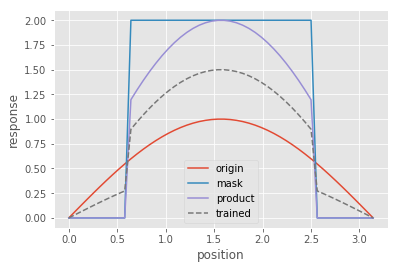

In [64]:
mask_y = np.array([0]*10 + [2]*30 + [0]*10)
dot_y = demo_y*mask_y
train_y = (dot_y+demo_y)/2
plt.plot(demo_x, demo_y, label="origin")
plt.plot(demo_x, mask_y, label="mask")
plt.plot(demo_x, dot_y, label="product")
plt.plot(demo_x, train_y, "--", label="trained", )
plt.xlabel("position")
plt.ylabel("response")
plt.legend()
plt.savefig("mask.svg")
plt.show()